<p> <img src="LOGO.png"  align="midle"></p>

**Data Science**<br>

*profmauricioeloy@gmail.com | mauricioeloy@usp.br.<br>*

**Sumário:**


* [1. Introdução](#1)
    * [1.1 Formulação do Problema](#1.1)
    * [1.2 Bibliotecas e Utilitários](#1.2)
    * [1.3 Carregando Dados](#1.3)
* [2. Análise Exploratória de Dados (EDA)](#2)
    * [2.1 Dataprep - Automatic EDA](#2.1)
* [3. Pré-processamento de Dados](#3)
    * [3.1 Tratamento NaN + Duplicados](#3.1)
        * [3.1.1 Listings](#3.1.1)
    * [3.2 Geração da Base Unificada](#3.2)
        * [3.2.1 Criação da base geral](#3.2.1)
    * [3.3 Feature Engineering](#3.3)
        * [3.3.1 Feature Creation](#3.3.1)
            * [3.3.1.1 Variáveis Dummies](#3.3.1.1)
        * [3.3.2 Feature Selection](#3.3.2)
* [4. Seleção do Modelo e Avaliação](#4) 
    * [4.1 ](#4.1)
    * [4.2 ](#4.2)
    * [4.3 Avaliação do Modelos)](#4.3)
        * [Métricas Utilizadas](#4.3.1)
        * [Comparativo dos modelos](#4.3.2)

<a id="1"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Introdução</h1>

<a id="1.1"></a>
<h2 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Formulação do Problema</h2>

Fazer uma análise exploratória para avaliar a consistência dos dados e identificar possíveis variáveis que impactam sua variável resposta.

Para posteriormente realizar a previsão do preço da estadia (feature ‘price’)

<a id="1.2"></a>
<h2 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Bibliotecas e Utilitários</h2>

In [10]:
#basicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import statsmodels.stats.api as sms


#EDA
# import pandas_profiling as pdpf

import holidays

from sklearn.model_selection import (train_test_split)#,RandomizedSearchCV)

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA 

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import (LinearRegression, 
                                  SGDRegressor,
                                 Lasso)

from sklearn.svm import SVR

from sklearn.neighbors import (KNeighborsRegressor)

from sklearn.tree import (DecisionTreeRegressor)

from sklearn.ensemble import (RandomForestRegressor, 
                              GradientBoostingRegressor,
                             BaggingRegressor,
                             ExtraTreesRegressor,
                             AdaBoostRegressor,
                             VotingRegressor)

import xgboost

from sklearn.metrics import (r2_score, mean_absolute_error, mean_squared_error, classification_report)

# from scipy.stats import (uniform, randint)
from scipy import stats

<a id="1.3"></a>
<h2 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Carregando Dados</h2>

Os dados utilizados são do Airbnb Rio de Janeiro, conforme fonte:
http://insideairbnb.com/get-the-data.html.

* listings.csv.gz: Dados detalhados de listagens para o Rio de Janeiro. 
    
*  calendar.csv.gz: Dados detalhados do calendário para listagens no Rio de Janeiro.

In [2]:
listings= pd.read_csv('../airbnb/data/listings.csv.gz')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20210222161029,2021-02-23,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,10.0,10.0,9.0,NaN,t,1,1,0,0,2.01
1,24480,https://www.airbnb.com/rooms/24480,20210222161029,2021-02-23,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,"The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,...,10.0,10.0,9.0,NaN,f,1,1,0,0,0.67
2,25026,https://www.airbnb.com/rooms/25026,20210222161029,2021-02-23,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,3746246,https://www.airbnb.com/users/show/3746246,...,10.0,10.0,9.0,NaN,f,11,11,0,0,1.82
3,35636,https://www.airbnb.com/rooms/35636,20210222161029,2021-02-24,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,...,10.0,10.0,9.0,NaN,f,1,1,0,0,2.02
4,35764,https://www.airbnb.com/rooms/35764,20210222161029,2021-02-23,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,...,10.0,10.0,10.0,NaN,f,1,1,0,0,2.79


In [3]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26615 entries, 0 to 26614
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26615 non-null  int64  
 1   listing_url                                   26615 non-null  object 
 2   scrape_id                                     26615 non-null  int64  
 3   last_scraped                                  26615 non-null  object 
 4   name                                          26586 non-null  object 
 5   description                                   25160 non-null  object 
 6   neighborhood_overview                         14314 non-null  object 
 7   picture_url                                   26615 non-null  object 
 8   host_id                                       26615 non-null  int64  
 9   host_url                                      26615 non-null 

In [4]:
listings.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                              29
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               9958
Length: 74, dtype: int64

In [5]:
listings.duplicated().sum()

0

In [6]:
calendar = pd.read_csv('../airbnb/data/calendar.csv.gz')
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,45766287,2021-02-23,f,$150.00,$150.00,2.0,1125.0
1,45764740,2021-02-24,f,$100.00,$100.00,1.0,4.0
2,45764740,2021-02-25,t,$100.00,$100.00,1.0,4.0
3,45764740,2021-02-26,t,$100.00,$100.00,1.0,4.0
4,45764740,2021-02-27,t,$100.00,$100.00,1.0,4.0


In [7]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9685126 entries, 0 to 9685125
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 517.2+ MB


In [8]:
calendar.isnull().sum()

listing_id           0
date                 0
available            0
price              177
adjusted_price     177
minimum_nights    5587
maximum_nights    5587
dtype: int64

In [9]:
calendar.duplicated().sum()

0

<a id="2"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Análise Exploratória de Dados (EDA)</h1>

<a id="2.1"></a>
<h2 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Automatic EDA -  Pandas Profiling</h2>

In [11]:
listings_rep = pdpf.ProfileReport(listings, title="Report Listings")
listings_rep.to_file(output_file='../airbnb/reports/listings_rep_base')

/home/mauricioeloy/anaconda3/lib/python3.8/site-packages/pandas_profiling/profile_report.py:283: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


<a id="3"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Pré-processamento de Dados</h1>

<a id="3.1"></a>
<h2 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">'listings'</h2>

<a id="3.1.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Exclusão de algumas variáveis</h3>

In [10]:
vars_drop_listings = ['listing_url', 
                        'scrape_id', 
                        'last_scraped',
                        'name', 
                        'description',
                        'neighborhood_overview', 
                        'picture_url', 
                        'host_id', 
                        'host_url', 
                        'host_name',
                        'host_location', 
                        'host_about', 
                        'host_response_time', 
                        'host_acceptance_rate',
                        'host_thumbnail_url', 
                        'host_picture_url', 
                        'host_total_listings_count','neighbourhood',
                        'neighbourhood_group_cleansed', 
                        'latitude', 
                        'longitude',
                        'bathrooms', 
                        'minimum_minimum_nights', 
                        'maximum_minimum_nights', 
                        'minimum_maximum_nights',
                        'maximum_maximum_nights', 
                        'minimum_nights_avg_ntm', 
                        'maximum_nights_avg_ntm',
                        'calendar_updated', 
                        'has_availability', 
                        'availability_30', 
                        'availability_60', 
                        'availability_90', 
                        'availability_365', 
                        'calendar_last_scraped', 
                        'number_of_reviews_ltm',
                        'number_of_reviews_l30d', 
                        'first_review', 'last_review',
                        'license',
                        'calculated_host_listings_count_entire_homes', 
                        'calculated_host_listings_count_private_rooms', 
                        'calculated_host_listings_count_shared_rooms',
                        'reviews_per_month', 
                        'host_neighbourhood', 
                        'neighbourhood_cleansed', 
                        'bathrooms_text']

listings = listings.drop(columns=vars_drop_listings)

listings = listings.dropna(subset = ['host_since', 'host_is_superhost', 'host_has_profile_pic',
                                    'host_identity_verified', 'host_listings_count'])

<a id="3.1.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">host_since</h3>

In [11]:
#desmembrando a variável host_since em host_since_year
def trans_host_since_year(l):
    try:
        host_since = int(l['host_since'].split('-')[0])
    except:
        host_since = np.nan
    return host_since

listings['host_since_year'] = listings.apply(lambda l: trans_host_since_year(l),axis=1)
listings = listings.drop(columns = ['host_since'])

<a id="3.1.3"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">host_response_rate</h3>

In [12]:
# transformar a variável em numérica
listings['host_response_rate_numeric'] = listings['host_response_rate'].astype(str)
listings['host_response_rate_numeric'] = listings['host_response_rate_numeric'].str.\
                                        replace("%", "").astype("float")
listings = listings.drop(columns = ['host_response_rate'])

<a id="3.1.4"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">property_type</h3>

In [13]:
#variavel com alta cardinalidade
list_property_type = ['Entire apartment','Private room in apartment', \
                      'Entire condominium', 'Private room in house','Entire house']


listings['property_type_mod'] = listings.apply(lambda l: (l['property_type']\
                                                    if (l['property_type'] in list_property_type)\
                                                    else 'Other values'), axis=1)
listings = listings.drop(columns='property_type')

<a id="3.1.5"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">host_verifications | amenities</h3>

In [14]:
def get_val_from_list(row, column_name, value):
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').\
                                replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val

def split_list_into_columns(df, column_name, max_dummies_num = 10):
    
    values_dict = {}

    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').\
                                    replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
      
    for value in values_sorted[: max_dummies_num]:
        df[column_name + '_' + value[0]] = df.apply(lambda row: get_val_from_list(row, column_name,\
                                                                                  value[0]),axis=1)
    return

In [15]:
split_list_into_columns(listings, 'host_verifications')
listings = listings.drop(columns = ['host_verifications'])

In [16]:
split_list_into_columns(listings, 'amenities')
listings = listings.drop(columns = ['amenities'])

<a id="3.1.6"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Completando dados faltantes</h3>

In [17]:
listings.isnull().sum().sort_values(ascending=False)

review_scores_accuracy                       10501
review_scores_location                       10499
review_scores_checkin                        10499
review_scores_cleanliness                    10498
review_scores_value                          10497
review_scores_communication                  10495
review_scores_rating                         10487
host_response_rate_numeric                    7992
bedrooms                                      1746
beds                                           252
amenities_ Hot water                             0
number_of_reviews                                0
minimum_nights                                   0
maximum_nights                                   0
calculated_host_listings_count                   0
price                                            0
accommodates                                     0
room_type                                        0
host_identity_verified                           0
host_has_profile_pic           

In [18]:
# corrigindo valores faltantes
listings.fillna({'bedrooms': listings['bedrooms'].median(),
                    'beds': listings['beds'].median(),
                    'host_response_rate_numeric': listings['host_response_rate_numeric'].mean(),
                    'review_scores_rating': listings['review_scores_rating'].mean(),
                    'review_scores_accuracy': listings['review_scores_accuracy'].mean(),
                    'review_scores_cleanliness': listings['review_scores_cleanliness'].mean(),
                    'review_scores_checkin': listings['review_scores_checkin'].mean(),
                    'review_scores_communication': listings['review_scores_communication'].mean(),
                    'review_scores_location': listings['review_scores_location'].mean(),
                    'review_scores_value': listings['review_scores_value'].mean()},\
                   inplace=True)

<a id="3.1.7"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Label Encoding</h3>

Sem o uso do `LabelEncoder()`

In [19]:
a_trocar = {'t': 1,
            'f': 0}

lista_trocar = ['host_is_superhost', 
                'host_has_profile_pic', 
                'host_identity_verified',
                'instant_bookable']
for troca in lista_trocar:
    listings[troca] = listings[troca].map(a_trocar)

<a id="3.1.8"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Eliminação de Outliers</h3>

In [20]:
#funcao auxiliar
def elimina_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    df_mod = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
    return df_mod

In [21]:
listings_mod = elimina_outlier(listings)

In [22]:
listings_mod.shape[0]/listings.shape[0]

0.9115866270542665

Verificação NaN e Duplicados

In [23]:
listings_mod.isnull().sum().sum()

0

In [24]:
listings_mod.duplicated().sum()

0

<a id="3.2"></a>
<h2 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">'calendar'</h2>

<a id="3.2.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Exclusão de algumas variáveis</h3>

In [25]:
vars_drop_calendar = ['available',
                     'adjusted_price',
                      'minimum_nights',
                      'maximum_nights']

calendar = calendar.drop(columns=vars_drop_calendar)

<a id="3.2.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">price</h3>

In [26]:
# transformar a variável em numérica
calendar = calendar.dropna(subset=['price'])
calendar['price_ca'] = calendar['price'].astype(str)
calendar['price_ca'] = calendar['price_ca'].str.replace("[$, ]", "").astype("float")
calendar = calendar.drop(columns = ['price'])

<a id="3.2.3"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">date</h3>

In [27]:
#criando a variavel datetime
calendar['date_datetime'] = pd.to_datetime(calendar['date'])

#criando a variavel de feriados
br_holidays = holidays.Brazil()
calendar['holiday'] = calendar.apply(lambda l: str(l['date_datetime'] in br_holidays), axis=1)
calendar['holiday'] = calendar['holiday'].map({'True': 1,'False': 0})

#criando a variavel de final de semana
calendar['weekday'] = calendar.apply(lambda l: l['date_datetime'].weekday(), axis=1)
calendar = calendar.drop(columns = ['date_datetime'])

In [28]:
#desmembrando a variável date em duas variáveis: month e year
calendar['month'] = calendar.apply(lambda l: int(l['date'].split('-')[1]), axis=1)
calendar['year'] =  calendar.apply(lambda l: int(l['date'].split('-')[0]), axis=1)
calendar = calendar.drop(columns = ['date'])

Verificação NaN e Duplicados

In [29]:
calendar.isnull().sum()

listing_id    0
price_ca      0
holiday       0
weekday       0
month         0
year          0
dtype: int64

In [30]:
calendar.duplicated().sum()

6869744

In [31]:
calendar = calendar.drop_duplicates()

<a id="3.2"></a>
<h2 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Merge entre 'calendar' e 'listings'</h2>

In [32]:
df_cl = pd.merge(calendar, (listings_mod.drop(columns = ['price'])),\
                 left_on='listing_id', right_on='id').drop(columns = ['id'])

<a id="3.4"></a>
<h2 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Variáveis Dummie</h2>

In [33]:
df_cl = pd.get_dummies(df_cl,columns=['property_type_mod','room_type'])

In [34]:
df_cl.head(1).T

,0
listing_id,45766287.0
price_ca,150.0
holiday,0.0
weekday,1.0
month,2.0
year,2021.0
host_is_superhost,0.0
host_listings_count,1.0
host_has_profile_pic,1.0
host_identity_verified,0.0


In [35]:
df_cl.to_csv(r'../airbnb/data/df_final.csv', index=False)

<a id="4"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Feature Importance</h1>

<a id="4.2"></a>
<h2 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Separação dos conjuntos X e y</h2>

In [11]:
df_airbnb = pd.read_csv('../airbnb/data/df_final.csv')

In [12]:
X = df_airbnb.drop(columns=['price_ca','listing_id'])
y = df_airbnb['price_ca']
print("Shape X =>", X.shape)

Shape X => (2568401, 55)


<a id="4.2"></a>
<h2 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Padronização do Dados</h2>

In [13]:
scaler = StandardScaler().fit(X)
sX = scaler.transform(X)

<a id="4.2"></a>
<h2 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Features Importantes</h2>

<a id="3.2.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Análise de Componentes Principais</h3>

<a id="3.2.2"></a>
<h4 style="background-color:orange;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;">Número de componentes a ser utilizado</h4>

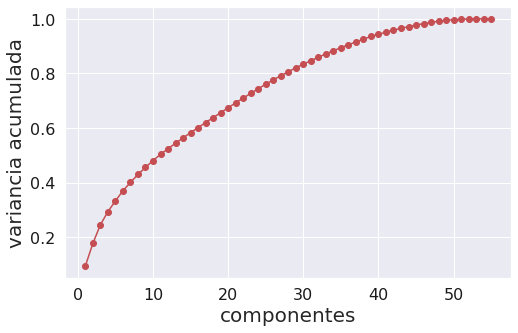

In [5]:
pca = PCA(random_state=42).fit(sX)

n_components_values = np.arange(1, len(X.columns) + 1)

plt.figure(figsize=(8, 5))
plt.plot(n_components_values, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('componentes', fontsize=20)
plt.ylabel('variancia acumulada', fontsize=20);
plt.xticks(color='k', size=16)
plt.yticks(color='k', size=16)
plt.grid(True)
plt.show(True)

In [6]:
np.round(pca.explained_variance_ratio_.cumsum(),2)

array([0.1 , 0.18, 0.25, 0.29, 0.33, 0.37, 0.4 , 0.43, 0.46, 0.48, 0.5 ,
       0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66, 0.67, 0.69, 0.71,
       0.73, 0.74, 0.76, 0.78, 0.79, 0.81, 0.82, 0.83, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.91, 0.92, 0.93, 0.94, 0.94, 0.95, 0.96, 0.97, 0.97,
       0.98, 0.98, 0.99, 0.99, 0.99, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

Conclusão: O número de componentes a ser utilizado será $36$

In [14]:
pca = PCA(random_state=42, n_components=36).fit(sX)

<a id="3.2.2"></a>
<h4 style="background-color:orange;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;">Importância dos atributos</h4>

In [8]:
np.round(pca.components_[0],3)

array([ 0.006,  0.   , -0.001,  0.002, -0.171, -0.03 , -0.03 , -0.296,
       -0.142, -0.115, -0.099,  0.011, -0.001, -0.149, -0.141, -0.145,
       -0.126, -0.13 , -0.134, -0.125, -0.111, -0.016, -0.075,  0.092,
       -0.133, -0.111, -0.303, -0.098, -0.168, -0.254, -0.207, -0.194,
       -0.01 , -0.186, -0.083, -0.091, -0.12 , -0.1  , -0.144, -0.153,
       -0.154, -0.142, -0.075, -0.049, -0.163, -0.181, -0.03 , -0.015,
        0.059,  0.16 ,  0.103, -0.234,  0.011,  0.215,  0.071])

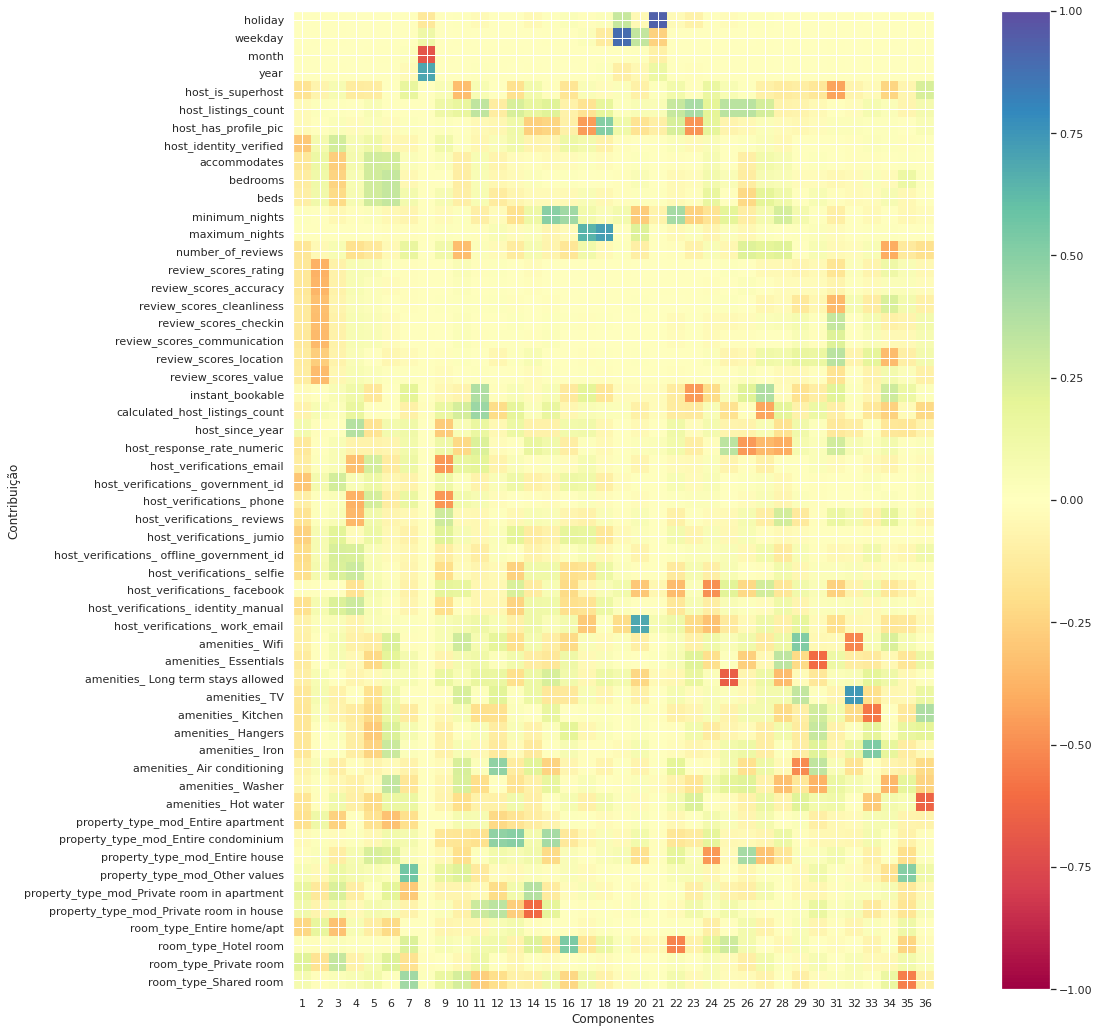

In [9]:
fig, ax = plt.subplots(figsize=(24, 18))
plt.imshow(pca.components_.T, cmap="Spectral", vmin=-1, vmax=1)
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(36), range(1, 37))
plt.xlabel("Componentes")
plt.ylabel("Contribuição")
plt.colorbar()

/home/mauricioeloy/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

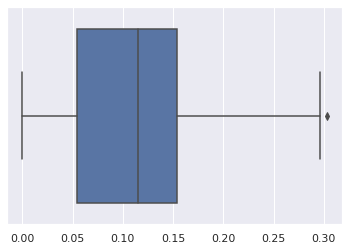

In [15]:
pca_abs = np.abs(np.round(pca.components_[0],3))
sns.boxplot(pca_abs)

In [17]:
comps = pd.DataFrame(pca.components_, columns=X.columns)
min_val = np.quantile(pca_abs,0.95)
num_components = 3
pca_cols = set()
for i in range(num_components):
    parts = comps.iloc[i][comps.iloc[i].abs() > min_val]
    pca_cols.update(set(parts.index))
l_pca_cols = list(pca_cols)
l_pca_cols

['review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_rating',
 'review_scores_communication',
 'host_verifications_ government_id',
 'review_scores_location',
 'review_scores_accuracy',
 'host_verifications_ offline_government_id',
 'room_type_Private room',
 'bedrooms',
 'host_verifications_ jumio',
 'review_scores_value',
 'host_identity_verified',
 'property_type_mod_Entire apartment',
 'accommodates',
 'room_type_Entire home/apt',
 'property_type_mod_Private room in apartment']

<a id="3.2.2"></a>
<h4 style="background-color:orange;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;">Incorporando as 36 componentes no dataset</h4>

In [18]:
sX_pca = pca.transform(sX)

for component in range(0,36):
    X['PCA'+str(component+1)] = sX_pca[:,component]

<a id="3.2.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">LASSO</h3>

<a id="3.2.2"></a>
<h4 style="background-color:orange;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;">Treinamento e obtenção dos coeficientes</h4>

In [12]:
lasso = Lasso(alpha = 0.1,random_state=42)
lasso.fit(sX, y)             
lasso_coef = list(lasso.coef_)
lasso.coef_

array([   15.27715799,    35.31204591,   189.83347801,   189.08027324,
        -202.1430806 ,   131.22585713,   -19.78688963,   111.94399302,
         259.4382006 ,   417.40635095,   -58.48540753,   -27.4017583 ,
          -5.26875118,   -75.74891443,  -104.08115883,   -29.04148874,
         117.9056638 ,     8.16653977,    86.12086052,    84.620318  ,
        -134.89328117,   151.79814894,   547.92881842,  -263.31086031,
         122.6919449 , -1128.30656552,   -34.75179115,  1266.74199125,
         -80.31116798,    57.00693943,  -345.14688501,   196.78074414,
        -146.48911712,   138.39482324,   378.49107558,    25.11578049,
        -238.27439521,    -5.36703027,    66.62888232,    91.76599558,
          13.43107164,    -6.07027139,    29.43797748,   -17.57494026,
        -144.01029447,     0.        ,   -96.09271006,   112.08231004,
          39.35771571,   -35.6459564 ,   -28.17223802,   -36.89749303,
          26.49349248,     0.        ,   141.96432785])

<a id="3.2.2"></a>
<h4 style="background-color:orange;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;">Importância dos atributos</h4>

In [13]:
list_lasso = []
for a in range(len(lasso_coef)):
    if lasso_coef[a]!=0:
        c = X.head(1).T.index[a]
        list_lasso.append(c)
list_lasso

['holiday',
 'weekday',
 'month',
 'year',
 'host_is_superhost',
 'host_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'accommodates',
 'bedrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'host_since_year',
 'host_response_rate_numeric',
 'host_verifications_email',
 'host_verifications_ government_id',
 'host_verifications_ phone',
 'host_verifications_ reviews',
 'host_verifications_ jumio',
 'host_verifications_ offline_government_id',
 'host_verifications_ selfie',
 'host_verifications_ facebook',
 'host_verifications_ identity_manual',
 'host_verifications_ work_email',
 'amenities_ Wifi',
 'amenities_ Essentials',
 'amenities_ Long term stays allowed',
 'amenities_ TV',
 'amenities_ Ki

<a id="3.2.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Atributos PCA & LASSO</h3>

In [14]:
pca_lasso = list(set(l_pca_cols) & set(list_lasso))
pca_lasso

['review_scores_communication',
 'review_scores_checkin',
 'host_verifications_ offline_government_id',
 'property_type_mod_Private room in apartment',
 'accommodates',
 'review_scores_value',
 'host_verifications_ government_id',
 'review_scores_accuracy',
 'room_type_Entire home/apt',
 'bedrooms',
 'host_verifications_ jumio',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_cleanliness',
 'host_identity_verified']

<a id="4"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Criação do Modelo</h1>

In [19]:
# pca_lasso = ['review_scores_communication',
#  'review_scores_checkin',
#  'host_verifications_ offline_government_id',
#  'property_type_mod_Private room in apartment',
#  'accommodates',
#  'review_scores_value',
#  'host_verifications_ government_id',
#  'review_scores_accuracy',
#  'room_type_Entire home/apt',
#  'bedrooms',
#  'host_verifications_ jumio',
#  'review_scores_location',
#  'review_scores_rating',
#  'review_scores_cleanliness',
#  'host_identity_verified']

# l_pca_cols = ['property_type_mod_Private room in apartment',
#  'review_scores_value',
#  'host_verifications_ government_id',
#  'review_scores_accuracy',
#  'room_type_Entire home/apt',
#  'bedrooms',
#  'host_verifications_ offline_government_id',
#  'review_scores_rating',
#  'review_scores_cleanliness',
#  'host_identity_verified',
#  'review_scores_communication',
#  'review_scores_checkin',
#  'property_type_mod_Entire apartment',
#  'accommodates',
#  'host_verifications_ jumio',
#  'review_scores_location',
#  'room_type_Private room']

# list_lasso = ['holiday',
#  'weekday',
#  'month',
#  'year',
#  'host_is_superhost',
#  'host_listings_count',
#  'host_has_profile_pic',
#  'host_identity_verified',
#  'accommodates',
#  'bedrooms',
#  'beds',
#  'minimum_nights',
#  'maximum_nights',
#  'number_of_reviews',
#  'review_scores_rating',
#  'review_scores_accuracy',
#  'review_scores_cleanliness',
#  'review_scores_checkin',
#  'review_scores_communication',
#  'review_scores_location',
#  'review_scores_value',
#  'instant_bookable',
#  'calculated_host_listings_count',
#  'host_since_year',
#  'host_response_rate_numeric',
#  'host_verifications_email',
#  'host_verifications_ government_id',
#  'host_verifications_ phone',
#  'host_verifications_ reviews',
#  'host_verifications_ jumio',
#  'host_verifications_ offline_government_id',
#  'host_verifications_ selfie',
#  'host_verifications_ facebook',
#  'host_verifications_ identity_manual',
#  'host_verifications_ work_email',
#  'amenities_ Wifi',
#  'amenities_ Essentials',
#  'amenities_ Long term stays allowed',
#  'amenities_ TV',
#  'amenities_ Kitchen',
#  'amenities_ Hangers',
#  'amenities_ Iron',
#  'amenities_ Air conditioning',
#  'amenities_ Washer',
#  'amenities_ Hot water',
#  'property_type_mod_Entire condominium',
#  'property_type_mod_Entire house',
#  'property_type_mod_Other values',
#  'property_type_mod_Private room in apartment',
#  'property_type_mod_Private room in house',
#  'room_type_Entire home/apt',
#  'room_type_Hotel room',
#  'room_type_Shared room']

<a id="4.2"></a>
<h2 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Comparativo de Modelos</h2>

<a id="3.1.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Função de Comparação e Modelos</h3>

In [27]:
def comparar_modelos(lista_modelos, df_xtrain, df_xtest, df_ytrain, df_ytest):
    for model in lista_modelos:  
        print("====="+str(model)+"=====")
        model.fit(df_xtrain, df_ytrain)
        y_pred = model.predict(df_xtest)
        residuos = df_ytest - y_pred
        bp = sms.het_breuschpagan(residuos, df_xtest)
        ks = stats.kstest(residuos, cdf="norm")

        r2= model.score(df_xtest, df_ytest)
        print('====R2:', r2,'\n')
        mae = mean_absolute_error(df_ytest, y_pred)
        print("===MAE:", np.round(mae,2),'\n')  

        print("===p-value Breusch-Pagan:", bp[1])
        if bp[1]<0.05:
            print("heterocedasticidade \n")
        else:
            print("HOMOCEDASTICIDADE \n")
        
        print("===p-value Kolmogorov-Smirkov", ks[1])
        if ks[1]<0.05:
            print("Distribuição não normal \n")
        else:
            print("Distribuição NORMAL \n")
        
            
        fig = plt.figure()
        l = plt.plot(y_pred, y_test, 'bo')
        xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
        yl = xl
        plt.plot(xl, yl, 'r--')
        plt.show(True)

In [21]:
models_S = [DummyRegressor(),
            LinearRegression(n_jobs=-1), 
            SGDRegressor(random_state=42), ]
#             SVR(), 
#             KNeighborsRegressor(n_jobs=-1)]

models = [DecisionTreeRegressor(random_state=42),
          RandomForestRegressor(random_state=42, 
                            n_estimators=100,
                            criterion='mse',
                            n_jobs=-1), 
          GradientBoostingRegressor(random_state=42), 
          BaggingRegressor(random_state=42,
                            n_jobs=-1), 
          ExtraTreesRegressor(random_state=42,
                            n_jobs=-1), 
          AdaBoostRegressor(random_state=42), 
          xgboost.XGBRegressor(random_state=42, n_jobs=-1)]

<a id="4.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Treino e teste</h3>

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<a id="4.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Features PCA & LASSO</h3>

<a id="3.1.1"></a>
<h4 style="background-color:orange;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;">Aplicação do filtro</h4>

In [23]:
#filtro PCA&LASSO
plX_train, plX_test = X_train[pca_lasso], X_test[pca_lasso]

scaler_pl = StandardScaler().fit(X[pca_lasso])
pl_sX_train, pl_sX_test = scaler_pl.transform(plX_train), scaler_pl.transform(plX_test)

<a id="3.1.1"></a>
<h4 style="background-color:orange;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;">Comparação dos Modelos</h4>

=====DecisionTreeRegressor(random_state=42)=====
====R2: 0.10245503509936249 

===MAE: 902.64 

===p-value Breusch-Pagan: 1.6336586262509502e-21
heterocedasticidade 

===p-value Kolmogorov-Smirkov 0.0
Distribuição não normal 



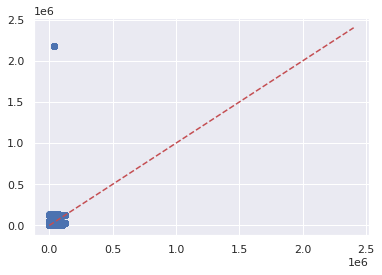

=====RandomForestRegressor(n_jobs=-1, random_state=42)=====


KeyboardInterrupt: 

In [28]:
comparar_modelos(models, plX_train, plX_test, y_train, y_test)

=====DummyRegressor()=====
R2: -7.031619915220944e-07
MAE: 1220.38
p-value 4.161900505824452e-16
Hipótese nula rejeitada


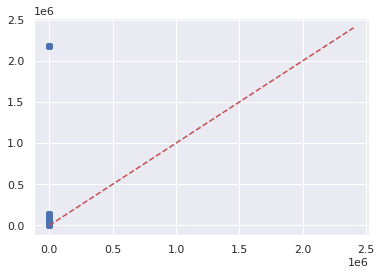

=====LinearRegression(n_jobs=-1)=====
R2: 0.0064357994285917375
MAE: 1150.81
p-value 4.1062140681473635e-16
Hipótese nula rejeitada


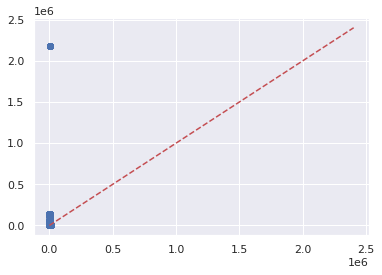

=====SGDRegressor(random_state=42)=====
R2: 0.0061579231916912835
MAE: 1252.78
p-value 3.9050241636582593e-16
Hipótese nula rejeitada


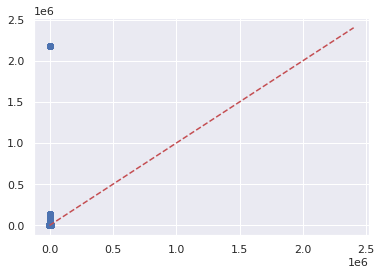

=====SVR()=====


In [ ]:
comparar_modelos(models_S, pl_sX_train, pl_sX_test, y_train, y_test)

<a id="4.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Features PCA</h3>

<a id="3.1.1"></a>
<h4 style="background-color:orange;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;">Aplicação do filtro</h4>

In [15]:
#filtro PCA
pcaX_train, pcaX_test = X_train[l_pca_cols], X_test[l_pca_cols]

scaler_pca = StandardScaler().fit(X[l_pca_cols])
pca_sX_train, pca_sX_test = scaler_pca.transform(pcaX_train), scaler_pca.transform(pcaX_test)

<a id="3.1.1"></a>
<h4 style="background-color:orange;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;">Comparação dos Modelos</h4>

=====DecisionTreeRegressor(random_state=42)=====
R2: 0.11289270045547894
RMSE: 95653216.59
MAE: 886.8
p-value 1.2063205553674172e-73
Hipótese nula rejeitada


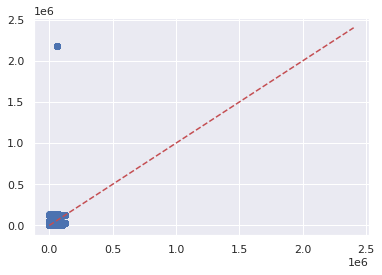

In [16]:
comparar_modelos(models, pcaX_train, pcaX_test, y_train, y_test)

In [22]:
comparar_modelos(models_S, pcaX_train, pcaX_test, y_train, y_test)

NameError: name 'pcaX_train' is not defined

<a id="4.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Features LASSO</h3>

<a id="3.1.1"></a>
<h4 style="background-color:orange;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;">Aplicação do filtro</h4>

In [21]:
#filtro LASSO
lX_train, lX_test = X_train[list_lasso], X_test[list_lasso]

scaler_l = StandardScaler().fit(X[list_lasso])
l_sX_train, l_sX_test = scaler_l.transform(lX_train), scaler_l.transform(lX_test)

<a id="3.1.1"></a>
<h4 style="background-color:orange;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;">Comparação dos Modelos</h4>

=====DecisionTreeRegressor(random_state=42)=====
R2: 0.7608726376970447
RMSE: 25784142.9
MAE: 255.97
p-value 0.0
Hipótese nula rejeitada


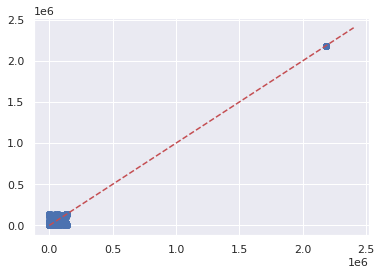

In [22]:
comparar_modelos(models, lX_train, lX_test, y_train, y_test)

=====DummyRegressor()=====
R2: -7.031619915220944e-07
RMSE: 107826058.81
MAE: 1220.38
p-value 1.4913922289982483e-110
Hipótese nula rejeitada


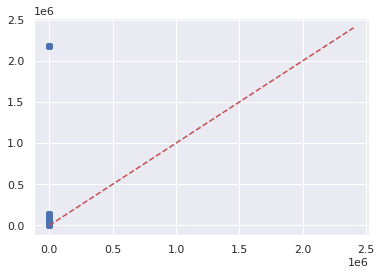

=====LinearRegression(n_jobs=-1)=====
R2: 0.013128298609755507
RMSE: 106410411.29
MAE: 1313.51
p-value 3.4576557567226996e-110
Hipótese nula rejeitada


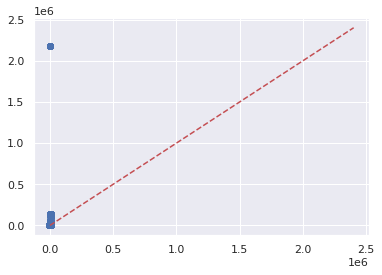

=====SGDRegressor(random_state=42)=====
R2: 0.012473521311563984
RMSE: 106481013.29
MAE: 1315.54
p-value 4.0699535949017286e-110
Hipótese nula rejeitada


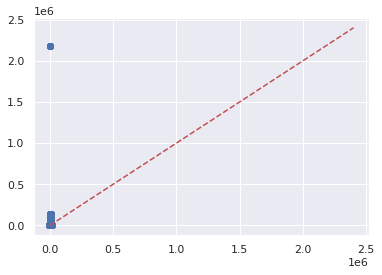

In [23]:
comparar_modelos(models_S, l_sX_train, l_sX_test, y_train, y_test)

<a id="4.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Features com as 36 componentes do PCA</h3>

<a id="3.1.1"></a>
<h4 style="background-color:orange;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;">Aplicação do filtro</h4>

In [19]:
#filtro PCA36
pca36X_train, pca36X_test = X_train.loc[:,'PCA1':'PCA36'], X_test.loc[:,'PCA1':'PCA36']

scaler_pca36 = StandardScaler().fit(X.loc[:,'PCA1':'PCA36'])
pca36_sX_train, pca36_sX_test = scaler_pca36.transform(pca36X_train), scaler_pca36.transform(pca36X_test)

<a id="3.1.1"></a>
<h4 style="background-color:orange;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;">Comparação dos Modelos</h4>

=====DecisionTreeRegressor(random_state=42)=====
R2: 0.4816688175152417
RMSE: 55889569.26
MAE: 317.65
p-value 3.8145110771852227e-44
Hipótese nula rejeitada


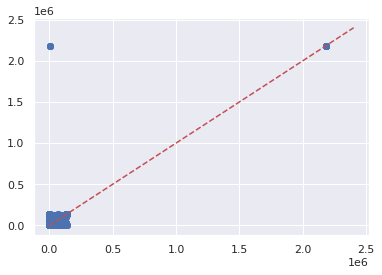

In [21]:
comparar_modelos(models, pca36X_train, pca36X_test, y_train, y_test)

=====DummyRegressor()=====
R2: -7.031619915220944e-07
RMSE: 107826058.81
MAE: 1220.38
p-value 3.501208156446174e-111
Hipótese nula rejeitada


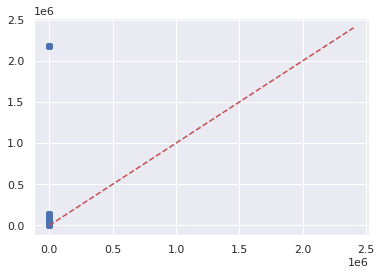

=====LinearRegression(n_jobs=-1)=====
R2: 0.010949555517928866
RMSE: 106645336.4
MAE: 1277.94
p-value 4.35625022074614e-111
Hipótese nula rejeitada


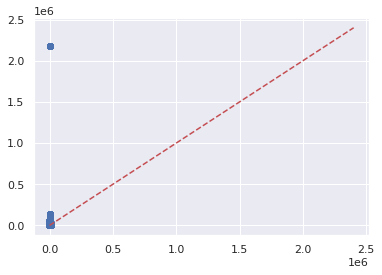

=====SGDRegressor(random_state=42)=====
R2: 0.010432323682670552
RMSE: 106701107.43
MAE: 1262.48
p-value 4.952065693195604e-111
Hipótese nula rejeitada


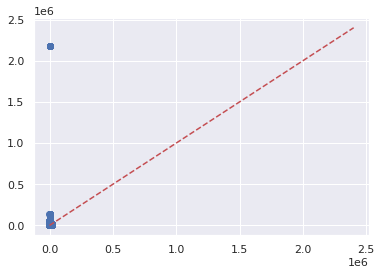

In [24]:
comparar_modelos(models_S, pca36_sX_train, pca36_sX_test, y_train, y_test)

In [ ]:
# dtr = DecisionTreeRegressor()

# distributions = {
#     "criterion": ['mse', 'friedman_mse', 'mae'],
#     "max_depth" : randint(low=1, high=6),
#     "min_samples_leaf": uniform(loc=0.001, scale=0.005),
#     "random_state": [42]
# }

# clf = RandomizedSearchCV(
#     estimator = dtr, 
#     param_distributions = distributions, 
#     n_iter = 50, 
#     scoring = "neg_mean_squared_error", 
#     n_jobs = 4, 
#     cv = 10, 
#     random_state = 42
# )

# search_dtr = clf.fit(X_train, y_train) 
# result_dtr = search_dtr.cv_results_ 
# search_dtr.best_params_ 

# print(search_dtr.best_params_)

# y_pred = clf.predict(X_test)
# print('\n clasification report:\n', classification_report(y_test, y_pred, digits=3))

In [ ]:
# dtr = DecisionTreeRegressor(**search.best_params_)
# dtr.fit(X_train, y_train)
# y_pred = dtr.predict(X_test)

# r2_dtr = dtr.score(X_test, y_test)
# print('R2:', r2_dtr)
# rmse_dtr = mean_squared_error(y_test, y_pred)
# print("RMSE:", rmse_dtr)     
# mae_dtr = mean_absolute_error(y_test, y_pred)
# print("MAE:", mae_dtr)    

In [ ]:
# rfr = RandomForestRegressor()

# distributions = {
#     "n_estimators": randint(low=10, high=300),
#     "criterion": ['mse', 'friedman_mse', 'mae'],
#     "max_features": ["sqrt", "log2"],
#     "random_state": [42]
# }

# clf = RandomizedSearchCV(
#     estimator = rfr, 
#     param_distributions = distributions, 
#     n_iter = 50, 
#     scoring = "neg_mean_squared_error", 
#     n_jobs = 4, 
#     cv = 10, 
#     random_state = 42
# )

# search_rfr = clf.fit(X_train, y_train) 
# result_rfr = search_rfr.cv_results_ 
# search_rfr.best_params_ 

# print(search_rfr.best_params_)

# y_pred = clf.predict(X_test)
# print('\n clasification report:\n', classification_report(y_test, y_pred, digits=3))

,holiday,weekday,month,year,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,...,PCA26,PCA27,PCA28,PCA29,PCA30,PCA31,PCA32,PCA33,PCA34,PCA35
0,0,1,2,2021,0,1.0,1,0,4,1.0,...,-0.765350,-0.329353,-0.025516,0.344103,0.771514,0.039460,-0.146500,0.048369,0.990008,-0.351523
1,0,2,2,2021,0,1.0,1,0,4,1.0,...,-0.765197,-0.332704,-0.023398,0.343707,0.771931,0.039085,-0.145980,0.048357,0.989289,-0.351309
2,0,3,2,2021,0,1.0,1,0,4,1.0,...,-0.765045,-0.336055,-0.021281,0.343311,0.772347,0.038710,-0.145459,0.048345,0.988570,-0.351095
3,0,4,2,2021,0,1.0,1,0,4,1.0,...,-0.764893,-0.339406,-0.019163,0.342916,0.772764,0.038336,-0.144938,0.048333,0.987851,-0.350881
4,0,5,2,2021,0,1.0,1,0,4,1.0,...,-0.764741,-0.342757,-0.017046,0.342520,0.773180,0.037961,-0.144417,0.048321,0.987132,-0.350667


In [ ]:
# for col, val in sorted(
#     zip(
#         X_train.columns,
#         cls.feature_importances_,
#     ),
#     key=lambda x: x[1],
#     reverse=True,
# ):
#     print(f"{col:10}{val:10.3f}")

